In [ ]:
#Exercise 3 (p.198, Chap.5), 8 (p.200, Chap.5), 1 (p.259, Chap.6), 9 (p.263, Chap.6), 9 (p.299, Chap.7) and 10 (p.300, Chap.7)

# Excercise 3- Chapter 5

In [2]:
# (a) Explain how k-fold cross-validation is implemented.

In [1]:
# 1-Random divide the set of observations into K groups.
# 2-The first "group" is considered as a validation set. The remaining groups are used for training the data.
# 3- We fit the model on the training set and we evaluate it on the test.
# 4-MSE is computed on the observations
# 5- We repeat the procedure K times, for each of the group of step 1. 

In [ ]:
# (b) What are the advantages and disadvantages of k-fold cross validation relative to:
     # The validation set approach?
# advantages: k-fold criss validation uses all the observations to fit the model, in contrary, the validation doesn't use the totality.
# disadvantages: k-fold cross validation is more difficult to implement and as a concept is more difficult to understand.

    # LOOCV?
# advantages: less computational effort needed for the k-fold cross validation.
# disadvantages: k-fold cross validation has more bias than the LOOCV.



# Excercise 8- Chapter 5

In [29]:
# We will now perform cross-validation on a simulated data set.

    #(a) Generate a simulated data set as follows:
set.seed(1)
x=rnorm(100)
y=x-2*x^2+rnorm (100)

data_frame<-data.frame(x,y)

#in this case, n=100 and p=2
#model: Y=X−2X2+ε.



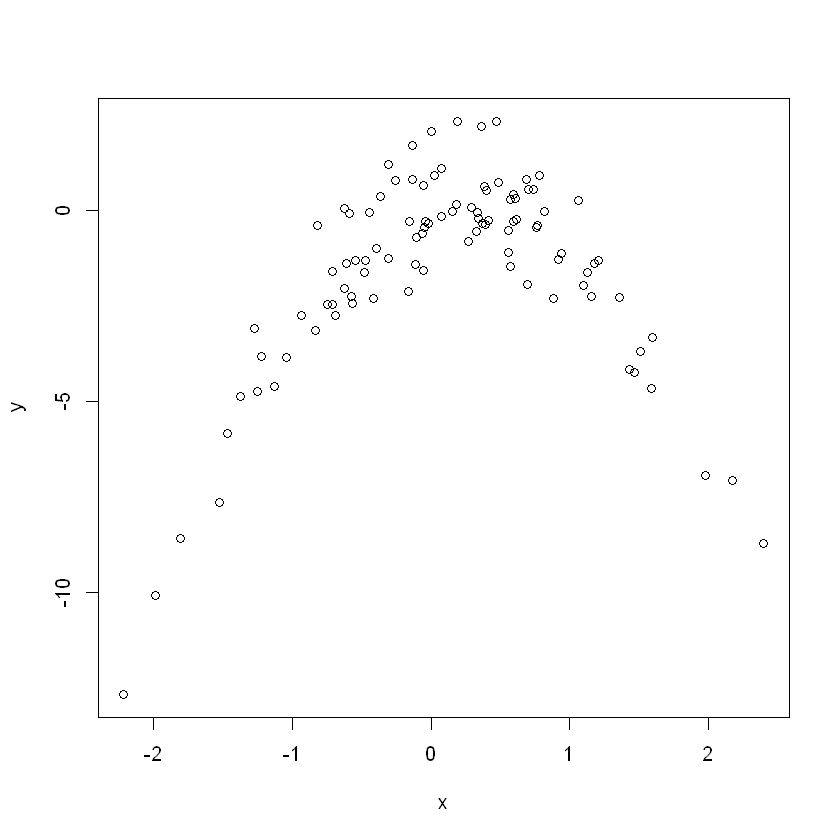

In [30]:
# (b) Create a scatterplot of X against Y . Comment on what you find
plot(x, y)

#There is a curved relationship

In [35]:
# (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares

   # Y=β0+β1X+ε

library(boot)
set.seed(1)

glm.fit=glm(y ~ x, data=data_frame)
cv.glm(data_frame,glm.fit)$delta[1]


[1] 7.288162

In [36]:
# Y=β0+β1X+β2X2+ε
glm.fit1=glm(y ~ poly(x, 2))
cv.glm(data_frame,glm.fit1)$delta[1]


[1] 0.9374236

In [37]:
#Y=β0+β1X+β2X2+β3X3+ε 
glm.fit2=glm(y ~ poly(x, 3))
cv.glm(data_frame,glm.fit2)$delta[1]


[1] 0.9566218

In [39]:
#Y=β0+β1X+β2X2+β3X3+β4X4+ε
glm.fit3=glm(y ~ poly(x, 4))
cv.glm(data_frame,glm.fit3)$delta[1]



[1] 0.9539049

In [40]:
# (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

# Y=β0+β1X+ε
set.seed(123)

glm.fit4=glm(y ~ x, data=data_frame)
cv.glm(data_frame,glm.fit4)$delta[1]

[1] 7.288162

In [41]:
# Y=β0+β1X+β2X2+ε
glm.fit5=glm(y ~ poly(x, 2))
cv.glm(data_frame,glm.fit5)$delta[1]


[1] 0.9374236

In [42]:
#Y=β0+β1X+β2X2+β3X3+ε 
glm.fit6=glm(y ~ poly(x, 3))
cv.glm(data_frame,glm.fit6)$delta[1]

[1] 0.9566218

In [43]:
#Y=β0+β1X+β2X2+β3X3+β4X4+ε
glm.fit7=glm(y ~ poly(x, 4))
cv.glm(data_frame,glm.fit7)$delta[1]



[1] 0.9539049

In [ ]:
#the results are the same as in part c

In [44]:
# (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer
#the lowest result is the one of the quadratic relation between x and y

In [45]:
# (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

summary(glm.fit3)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


# Excercise 1-chapter 6


In [46]:
# We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p+1 models, containing 0,1,2,…,p predictors. Explain your answers:

In [47]:
# (a) Which of the three models with k predictors has the smallest training RSS? 
#The model having the smallest training RSS is the best subset selection as it considers every model with k predictrors. 

In [48]:
# (b) Which of the three models with k predictors has the smallest test RSS? 
#Impossible to know with this few information


In [49]:
# (c) True or False:
# i) TRUE
# ii) TRUE
# iii) FALSE
# iv) FALSE
# v) FALSE

# Excercise 9-chapter 6


In [56]:
# In this excercise, we will predict the number of applications received using the other variables in the College data set.
# (a) Split the data set into a training set and a test set.

library(ISLR)
data(College)
set.seed(1)

head(College)


#i used the same way of splitting the data as in the book, page 248
set.seed(1)
train=sample(c(TRUE,FALSE), nrow(College), rep=TRUE)
test=(!train)


train_part= College[train,]
test_part = College[test,]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [65]:
# (b) Fit a linear model using least squares on the training set, and report the test error obtained.

fit_linearmodel = lm(Apps~., train_part)
pred_linearmodel = predict(fit_linearmodel, test_part)

err_linearmodel = mean((test_part$Apps - pred_linearmodel)^2)
err_linearmodel

[1] 984743.1

In [71]:
# (c) Fit a ridge regression model on the training set, with λ chosenby cross-validation. Report the test error obtained.

library(glmnet)


#Create the train.x and train.y matrices with dummy encoding as there is a categorical variable in the dataset

train.Y = train_part[, "Apps"]
test.X = model.matrix(Apps ~ ., data = test_part)
test.Y = test_part[, "Apps"]

grid = 10 ^ seq(4, -2, length=100)
ridge.mod = glmnet(train.X, train.Y, alpha =0, lambda=grid, thresh = 1e-12)
lambda.best = ridge.mod$lambda.min
ridge.pred = predict(ridge.mod, newx= test.X, s=lambda.best)
(ridge.err = mean((test.Y - ridge.pred)^2))


Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 1069261

In [72]:
# (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.
lasso.mod = glmnet(train.X, train.Y, alpha =1, lambda=grid, thresh = 1e-12)
lasso.cv = cv.glmnet(train.X, train.Y, alpha =1, lambda=grid, thresh = 1e-12)
lambda.best = lasso.cv$lambda.min
lasso.pred = predict(lasso.mod, newx= test.X, s=lambda.best)
(lasso.err = mean((test.Y - lasso.pred)^2))



Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] 992532.5

In [74]:
# (e) Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

library(pls)
pcr.fit = pcr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(pcr.fit, val.type="MSEP")

ERROR: Error in library(pls): there is no package called 'pls'


# Excercise 9 chapter 7

In [81]:
# (a) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

library(MASS)
set.seed(1)
fit_poly <- lm(nox ~ poly(dis, 3), data = Boston)
coef(summary(fit_poly))



,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),0.5546951,0.00275939,201.020894,0.000000e+00
"poly(dis, 3)1",-2.0030959,0.06207094,-32.271071,1.597201e-124
"poly(dis, 3)2",0.8563300,0.06207094,13.795987,6.133104e-37
"poly(dis, 3)3",-0.3180490,0.06207094,-5.123959,4.274950e-07


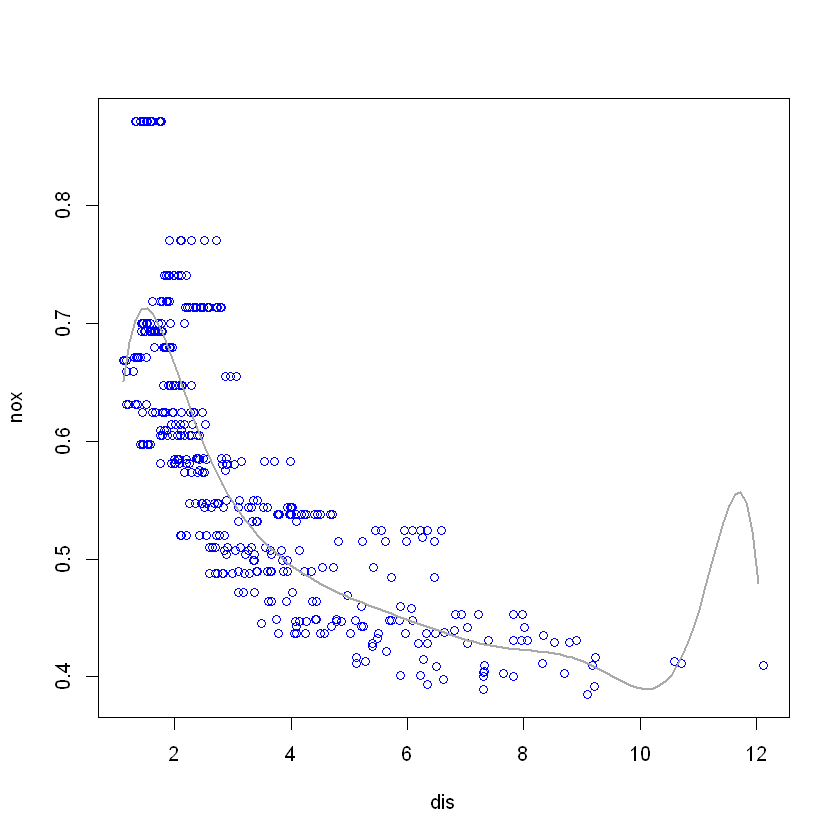

In [86]:
#code from the book
x <- range(Boston$dis)
y <- seq(from = x[1], to = x[2], by = 0.1)
preds <- predict(fit, list(dis = y))
plot(nox ~ dis, data = Boston, col = "blue")
lines(y, preds, lwd = 2,col = "darkgrey")

In [84]:
# (b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.




Call:
lm(formula = nox ~ bs(dis, knots = c(4, 7, 11)), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.124567 -0.040355 -0.008702  0.024740  0.192920 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    0.73926    0.01331  55.537  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))1 -0.08861    0.02504  -3.539  0.00044 ***
bs(dis, knots = c(4, 7, 11))2 -0.31341    0.01680 -18.658  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))3 -0.26618    0.03147  -8.459 3.00e-16 ***
bs(dis, knots = c(4, 7, 11))4 -0.39802    0.04647  -8.565  < 2e-16 ***
bs(dis, knots = c(4, 7, 11))5 -0.25681    0.09001  -2.853  0.00451 ** 
bs(dis, knots = c(4, 7, 11))6 -0.32926    0.06327  -5.204 2.85e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06185 on 499 degrees of freedom
Multiple R-squared:  0.7185,	Adjusted R-squared:  0.7151 
F-statistic: 212.3 on 6 and 499 DF,  p-value: <

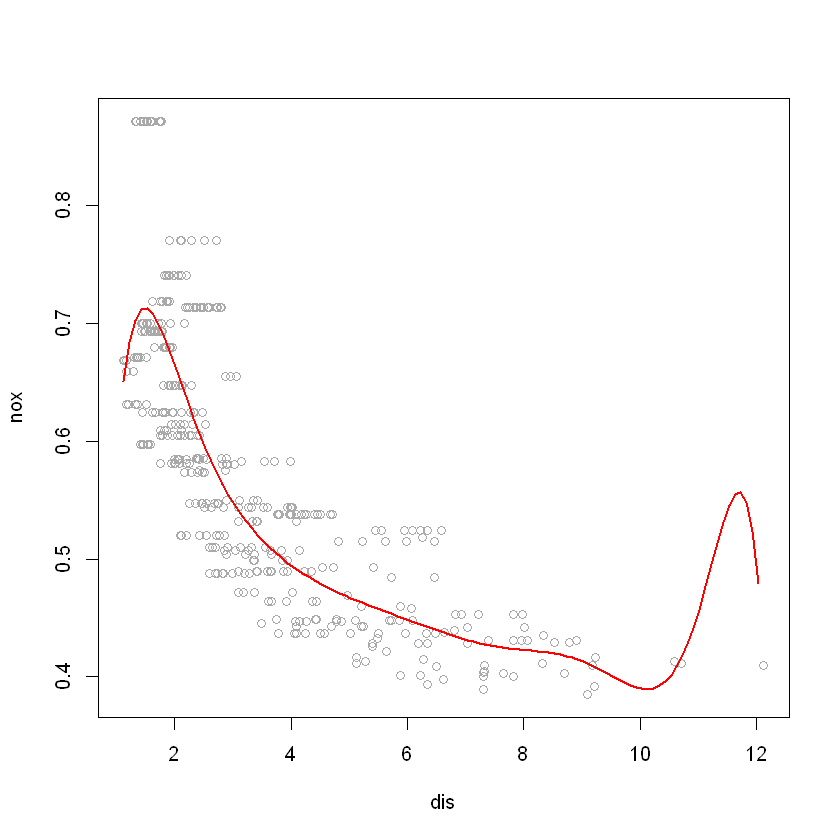

In [88]:
#code from the book

#(d) Use the “bs()” function to fit a regression spline to predict “nox” using “dis”. Report the output for the fit using four degrees of freedom. How did you choose the knots ? Plot the resulting fit.
library(splines)
fit <- lm(nox ~ bs(dis, knots = c(4, 7, 11)), data = Boston)
summary(fit)
pred <- predict(fit, list(dis = dis.grid))
plot(nox ~ dis, data = Boston, col = "darkgrey")
lines(dis.grid, preds, col = "red", lwd = 2)

# Excercise 10 chapter 7